In [2]:
import pandas as pd

I- Préparation des données 

In [3]:
data = pd.read_csv("Data_Arbre.csv")
colomns = ["haut_tot", "longitude", "latitude"]
print(data[colomns])

reduit = data[colomns].dropna() # pour enlever les autres colonnes pas pertinentes

      haut_tot  longitude   latitude
0          6.0   3.293264  49.840500
1         13.0   3.273380  49.861409
2         12.0   3.289068  49.844513
3         16.0   3.302387  49.861778
4          5.0   3.304047  49.858446
...        ...        ...        ...
7404       3.0   3.283505  49.848695
7405       3.0   3.283436  49.848682
7406       3.0   3.297078  49.860413
7407       3.0   3.291685  49.848009
7408       3.0   3.301788  49.861503

[7409 rows x 3 columns]


In [4]:
X = reduit[['haut_tot']].values # recuperer les données de hauteur totale 
print(X)

[[ 6.]
 [13.]
 [12.]
 ...
 [ 3.]
 [ 3.]
 [ 3.]]


II-Apprentissage non supervisé

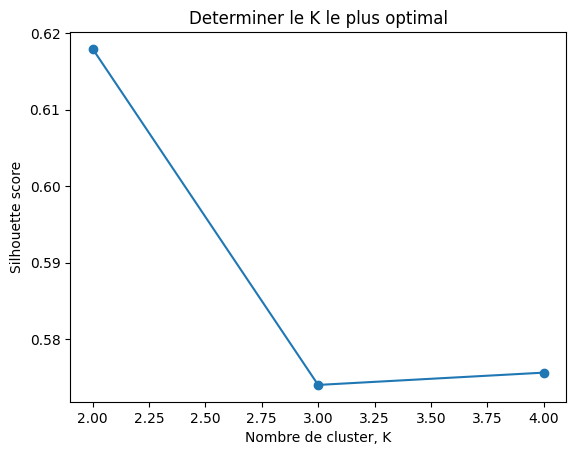

Le meilleur nombre de cluster est : 2


In [6]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Plage de valeurs de K à tester
range_n_clusters = list(range(2, 5))
silhouette_avg = []

for num_clusters in range_n_clusters:
    # Initialisation de KMeans avec `num_clusters`
    kmeans = KMeans(n_clusters=num_clusters, random_state=10)
    
    # Fit et prédictions
    cluster_labels = kmeans.fit_predict(X)
    
    # Calcul du score de silhouette
    score = silhouette_score(X, cluster_labels)
    silhouette_avg.append(score)

# Tracer les scores de silhouette pour chaque valeur de K
plt.plot(range_n_clusters, silhouette_avg, marker='o')
plt.xlabel('Nombre de cluster, K')
plt.ylabel('Silhouette score')
plt.title('Determiner le K le plus optimal')
plt.show()

# Trouver le K qui maximise le score de silhouette
best_k = range_n_clusters[np.argmax(silhouette_avg)]
print(f'Le meilleur nombre de cluster est :', best_k)


In [7]:
from sklearn.cluster import KMeans

nb_clusters = 2
kmeans = KMeans(n_clusters=nb_clusters, random_state=0).fit(X)
reduit['cluster'] = kmeans.labels_

III-Métriques pour l'Apprentissage Non Supervisé

In [8]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score

silhouette = silhouette_score(X, kmeans.labels_)
davies_bouldin = davies_bouldin_score(X,kmeans.labels_)
calinski = calinski_harabasz_score(X, kmeans.labels_)

print('Silhouette score : ', silhouette)
print('Score Davies Bouldin: ', davies_bouldin)
print('Score de Calinski Harabasz : ', calinski)


Silhouette score :  0.6183070397058011
Score Davies Bouldin:  0.5327731513733844
Score de Calinski Harabasz :  17209.603803596143


IV- Visualisation sur carte

In [13]:
import plotly.express as px

fig = px.scatter_mapbox(
    reduit,
    lat = 'latitude',
    lon ='longitude',
    color = 'cluster',
    color_continuous_scale= 'plotly3',
    zoom = 12,
    height = 600, 
)

fig.update_layout(mapbox_style = "open-street-map")
fig.update_layout(margin = {"r":0,"t":0,"l":0,"b":0})
fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

V-Fonctionnalité supplémentaire - détéction des anomalies

In [10]:
from sklearn.ensemble import IsolationForest

#Récupérer les données pertinentes
colomns_anomalies = data[["age_estim", "tronc_diam", "haut_tronc"]]
#Effectuer un IsolationForest
isolation = IsolationForest(contamination=0.05, random_state=42)
reduit['anomaly']= isolation.fit_predict(colomns_anomalies)


anomalies = reduit[reduit['anomaly'] ==-1]
nb_anomalies = np.count_nonzero(reduit['anomaly'] == -1)
print("Nombre d'anomalies détéctées: ", nb_anomalies)

Nombre d'anomalies détéctées:  371


In [11]:
import plotly.express as px


fig = px.scatter_mapbox(
    reduit,
    lat = 'latitude',
    lon ='longitude',
    #hover_name = 'haut_tot',
    color = 'anomaly',
    color_continuous_scale= 'red',
    zoom = 12,
    height = 600, 
)

fig.update_layout(mapbox_style = "open-street-map")
fig.update_layout(margin = {"r":0,"t":0,"l":0,"b":0})
fig.show()

ValueError: 
    Invalid value of type 'builtins.str' received for the 'colorscale' property of make_figure
        Received value: 'red'

    The 'colorscale' property is a colorscale and may be
    specified as:
      - A list of colors that will be spaced evenly to create the colorscale.
        Many predefined colorscale lists are included in the sequential, diverging,
        and cyclical modules in the plotly.colors package.
      - A list of 2-element lists where the first element is the
        normalized color level value (starting at 0 and ending at 1),
        and the second item is a valid color string.
        (e.g. [[0, 'green'], [0.5, 'red'], [1.0, 'rgb(0, 0, 255)']])
      - One of the following named colorscales:
            ['aggrnyl', 'agsunset', 'algae', 'amp', 'armyrose', 'balance',
             'blackbody', 'bluered', 'blues', 'blugrn', 'bluyl', 'brbg',
             'brwnyl', 'bugn', 'bupu', 'burg', 'burgyl', 'cividis', 'curl',
             'darkmint', 'deep', 'delta', 'dense', 'earth', 'edge', 'electric',
             'emrld', 'fall', 'geyser', 'gnbu', 'gray', 'greens', 'greys',
             'haline', 'hot', 'hsv', 'ice', 'icefire', 'inferno', 'jet',
             'magenta', 'magma', 'matter', 'mint', 'mrybm', 'mygbm', 'oranges',
             'orrd', 'oryel', 'oxy', 'peach', 'phase', 'picnic', 'pinkyl',
             'piyg', 'plasma', 'plotly3', 'portland', 'prgn', 'pubu', 'pubugn',
             'puor', 'purd', 'purp', 'purples', 'purpor', 'rainbow', 'rdbu',
             'rdgy', 'rdpu', 'rdylbu', 'rdylgn', 'redor', 'reds', 'solar',
             'spectral', 'speed', 'sunset', 'sunsetdark', 'teal', 'tealgrn',
             'tealrose', 'tempo', 'temps', 'thermal', 'tropic', 'turbid',
             'turbo', 'twilight', 'viridis', 'ylgn', 'ylgnbu', 'ylorbr',
             'ylorrd'].
        Appending '_r' to a named colorscale reverses it.
